In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import plot_model
from IPython.display import SVG

- 'fixed acidity(주석산 농도)'
- 'volatile acidity(아세트산 농도)'
- 'citric acid(구연산 농도)'
- 'residual sugar(잔류 당분 농도)'
- 'chlorides(염화나트륨 농도)'
- 'free sulfur dioxide(유리 아황산 농도)'
- 'total sulfur dioxide(총 아황산 농도)'
- 'density(밀도)'
- 'pH(산성도)'
- 'sulphates(황산칼륨 농도)'
- 'alcohol(알코올 도수)'
- 'quality(와인 등급)'
- 'class(와인 종류 1: Red / 2 : White)'

In [2]:
df = pd.read_csv('wine.csv')
df.columns=['fixed acidity', 'volatile acidity', 'citric acid', 
            'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
            'density', 'pH', 'sulphates', 'alcohol', 'quality', 'class']
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6496 entries, 0 to 6495
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6496 non-null   float64
 1   volatile acidity      6496 non-null   float64
 2   citric acid           6496 non-null   float64
 3   residual sugar        6496 non-null   float64
 4   chlorides             6496 non-null   float64
 5   free sulfur dioxide   6496 non-null   float64
 6   total sulfur dioxide  6496 non-null   float64
 7   density               6496 non-null   float64
 8   pH                    6496 non-null   float64
 9   sulphates             6496 non-null   float64
 10  alcohol               6496 non-null   float64
 11  quality               6496 non-null   int64  
 12  class                 6496 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


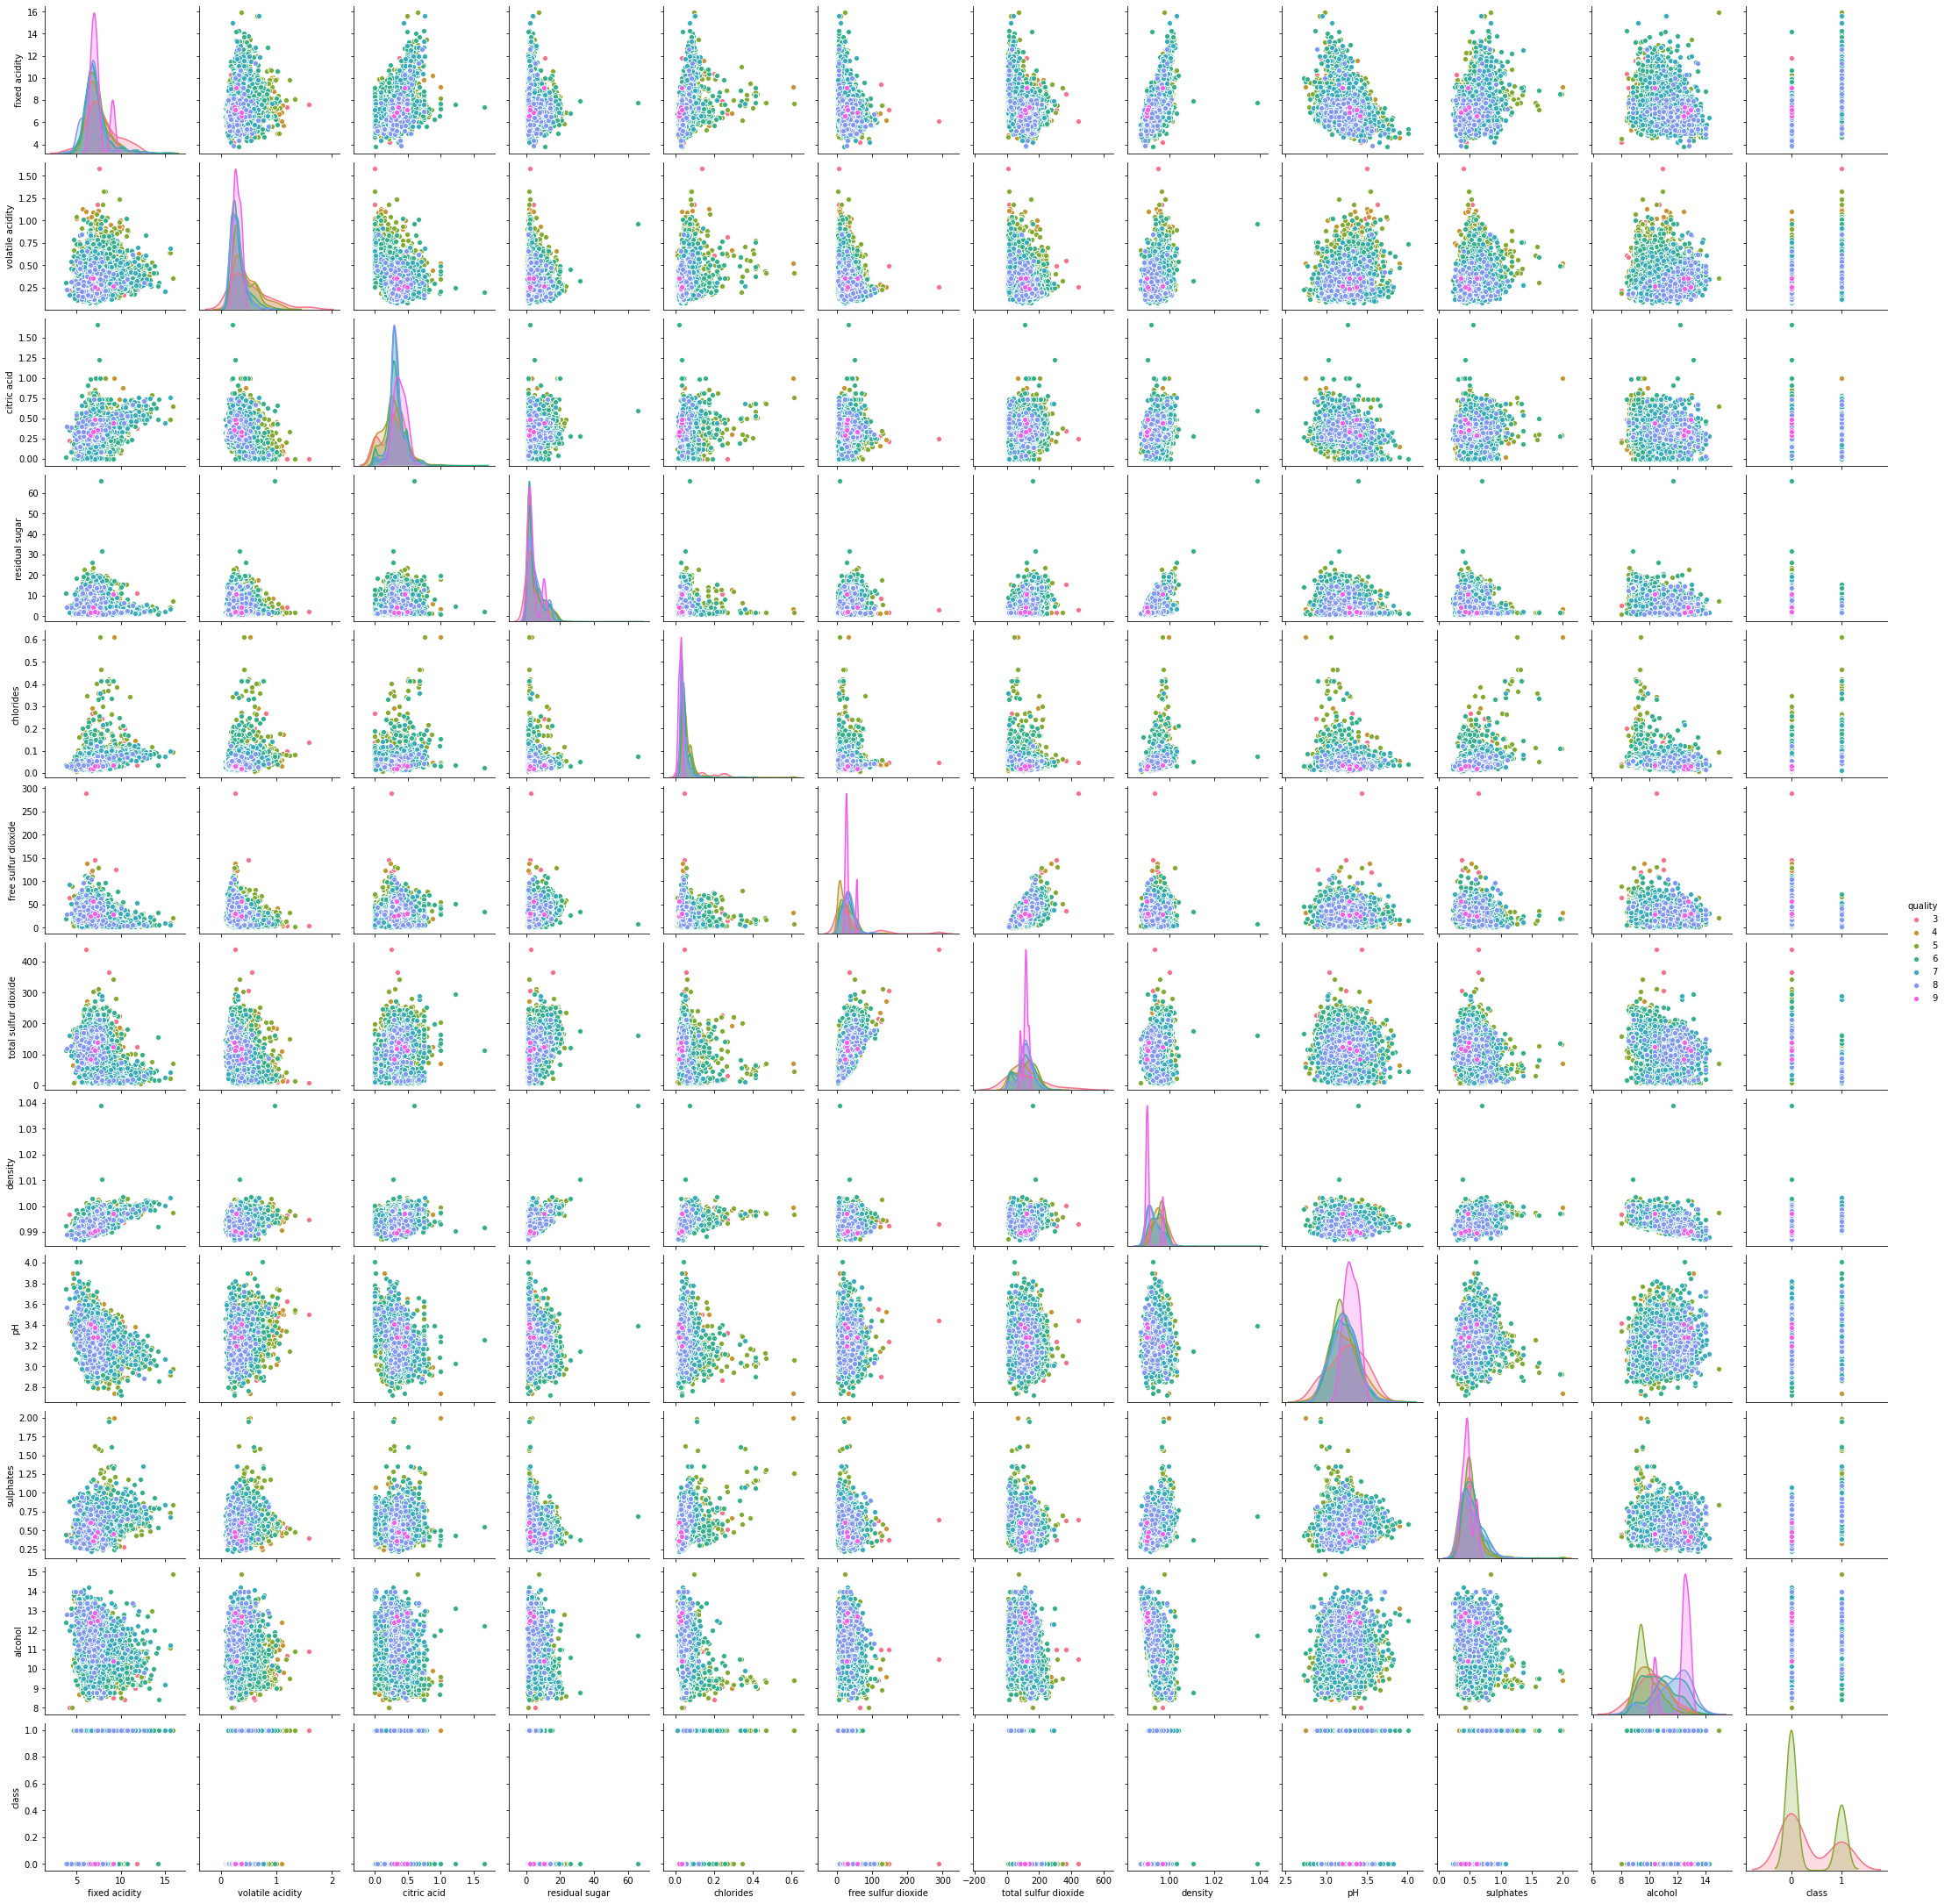

In [4]:
g = sns.pairplot(df, hue="quality", palette="husl")

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [6]:
# 기타 데이터로 class 예측
X = df.iloc[:, 0:11].values
y = df.iloc[:, 11:12].values

# 이산형 변수를 학습시키기 쉬운 값으로 변환
encoder = LabelEncoder() # 라벨인코더 생성
y1 = encoder.fit_transform(y) # y를 기준으로 인코더 피팅
Y = pd.get_dummies(y1).values # 배열로 분할

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [7]:
# Train 데이터와 Test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((5196, 11), (1300, 11), (5196, 7), (1300, 7))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 455       
Total params: 5,383
Trainable params: 5,383
Non-trainable params: 0
_________________________________________________________________


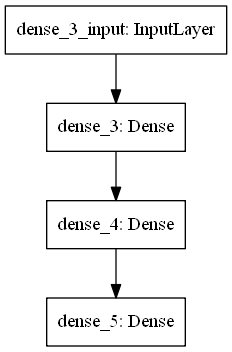

In [13]:
model = Sequential() # 선형 스택 모델

model.add(Dense(64, input_shape=(11, ), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

# 평가지표는 categorical_crossentropy, 최적화함수는 Adam을 사용
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()
plot_model(model, to_file='model.png')

In [14]:
# 모델 실행 및 결과 저장
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
163/163 [==============================] - 0s 3ms/step - loss: 1.4979 - accuracy: 0.4088 - val_loss: 1.6130 - val_accuracy: 0.2362
Epoch 2/100
163/163 [==============================] - 0s 2ms/step - loss: 1.3514 - accuracy: 0.4130 - val_loss: 1.2897 - val_accuracy: 0.4108
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 1.3030 - accuracy: 0.4396 - val_loss: 1.2798 - val_accuracy: 0.4169
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 1.2393 - accuracy: 0.4482 - val_loss: 1.2706 - val_accuracy: 0.4523
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 1.2374 - accuracy: 0.4459 - val_loss: 1.2991 - val_accuracy: 0.4608
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 1.2543 - accuracy: 0.4440 - val_loss: 1.2756 - val_accuracy: 0.4646
Epoch 7/100
163/163 [==============================] - 0s 2ms/step - loss: 1.2305 - accuracy: 0.4554 - val_loss: 1.2723 - val_accuracy: 0.4538

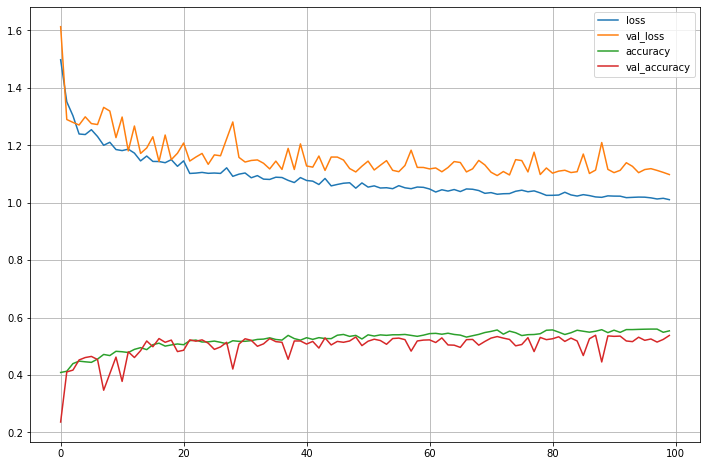

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

41/41 [==============================] - 0s 1ms/step - loss: 1.0980 - accuracy: 0.5377
Accuracy = 0.54


In [17]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.00      0.00      0.00        43
           2       0.55      0.64      0.59       425
           3       0.53      0.69      0.60       577
           4       0.52      0.13      0.20       196
           5       0.00      0.00      0.00        45
           6       0.00      0.00      0.00         2

    accuracy                           0.54      1300
   macro avg       0.37      0.22      0.22      1300
weighted avg       0.50      0.54      0.49      1300

[[  1   1   5   5   0   0   0]
 [  0   0  36   7   0   0   0]
 [  0   0 274 149   2   0   0]
 [  0   0 165 399  13   0   0]
 [  0   0  12 157  25   2   0]
 [  0   0   7  30   8   0   0]
 [  0   0   0   2   0   0   0]]
